In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring a small data of the Time Spent Online example
df = pd.read_csv('friends.csv', delim_whitespace = True, names=['Friends', 'Time Online'])
df.head()

,Friends,Time Online
0,8,375
1,14,657
2,7,484
3,7,381
4,10,589


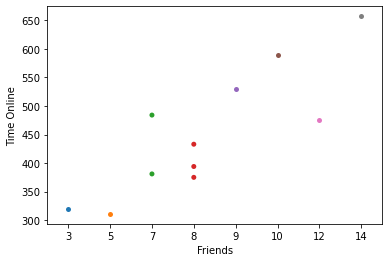

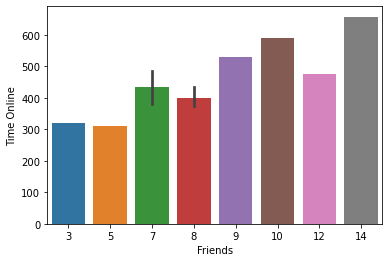

In [45]:
# Plot friends vs Time Online
sns.swarmplot(x="Friends", y="Time Online", data=df)
plt.show()

# Also, do a bar-plot to visualize this
sns.barplot(x="Friends", y="Time Online", data=df)
plt.show()

# Both these charts show that there no direct correlation or linear relationship
# between number of friends one may have and the amount of time spent online.

In [47]:
# Explore a machine-learning model through the Random-Forest algorithm
# Not expecting to yield good prediction accuracy - small dataset (10-values)

import numpy as np  
from scipy.stats import uniform  
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Split the data into test/train
np.random.seed(1234)
df['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(df))
df_train = df[df['runiform'] >= 0.33]
df_test = df[df['runiform'] < 0.33]

# Examine the train/test dataframes
print(' Train dataframe: \n', df_train)
print('\n Test dataframe: \n', df_test)

# Introduce the Random-Forest algorithm
rf_model_maker = RandomForestRegressor(random_state = 10)
y_train = df_train.loc[:, ['Time Online']]
x_train = df_train.loc[:, ['Friends']]

# Fit the model
rf_model_fit = rf_model_maker.fit(x_train, y_train)

# Predict and check for accuracy
x_test = df_test.loc[:, ['Friends']]
y_pred = rf_model_fit.predict(x_test)
y_test = np.array(df_test['Time Online'])

accuracy = metrics.accuracy_score(y_test, y_pred.astype(int))
print('\n Accuracy Prediction:\n', accuracy)

 Train dataframe: 
     Friends  Time Online  runiform
1        14          657  0.622109
2         7          484  0.437728
3         7          381  0.785359
4        10          589  0.779976
7         3          319  0.801872
8         8          433  0.958139
9         9          529  0.875933
10        5          311  0.357817

 Test dataframe: 
    Friends  Time Online  runiform
0        8          375  0.191519
5        8          394  0.272593
6       12          476  0.276464

 Accuracy Prediction:
 0.0


<ipython-input-47-2c36d6e53aa9>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_fit = rf_model_maker.fit(x_train, y_train)
